In [3]:
import os
import zipfile
import random
import shutil
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.layers import  Dense, Flatten, Input,Dropout
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
print(tf.version.VERSION)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.test.gpu_device_name()
import pandas as pd 
import numpy as np
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Sequential,load_model
import matplotlib.pyplot as plt
from random import randint
import cv2
import matplotlib.image as mpimg

2.4.1


In [17]:
# load data train and test
TRAINING_DIR ="../input/fire-smoke/Fire_Smoke/Train"
train_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=8,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    target_size=(150, 150))

VALIDATION_DIR = "../input/fire-smoke/Fire_Smoke/Test"
validation_datagen = ImageDataGenerator(rescale=1./255.,
                                        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=8,
                                                              shuffle = False,
                                                              class_mode='categorical',
                                                              color_mode='rgb',
                                                              target_size=(150, 150))

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [5]:
# crate network
conv_base = tf.keras.applications.VGG16(weights='imagenet', 
                 include_top=False,
                 input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy', 
             optimizer=tf.keras.optimizers.Adam(lr=1e-4), 
             metrics=['accuracy'])



model.summary()

# fit network
history = model.fit(train_generator,epochs=500,validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/500
338/338 [==============================] - 26s 73ms/step - loss: 0.6978 - accuracy: 0.7005 - val_loss: 0.5843 - val_accuracy: 0.7633
Epoch 2/500
338/338 [==============================] - 24s 72ms/step - loss: 0.3853 - acc


--------chart---------


<AxesSubplot:>

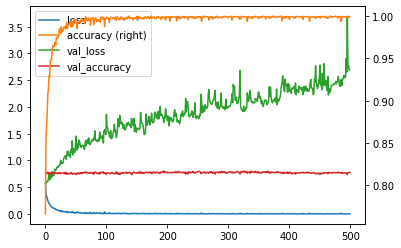

In [6]:
print("\n--------chart---------")
result = pd.DataFrame.from_dict(history.history)
result.plot.line(secondary_y=["accuracy"])

In [18]:
# predict Images
predict = model.predict(validation_generator)
preds_classes = np.argmax(predict, axis=-1)

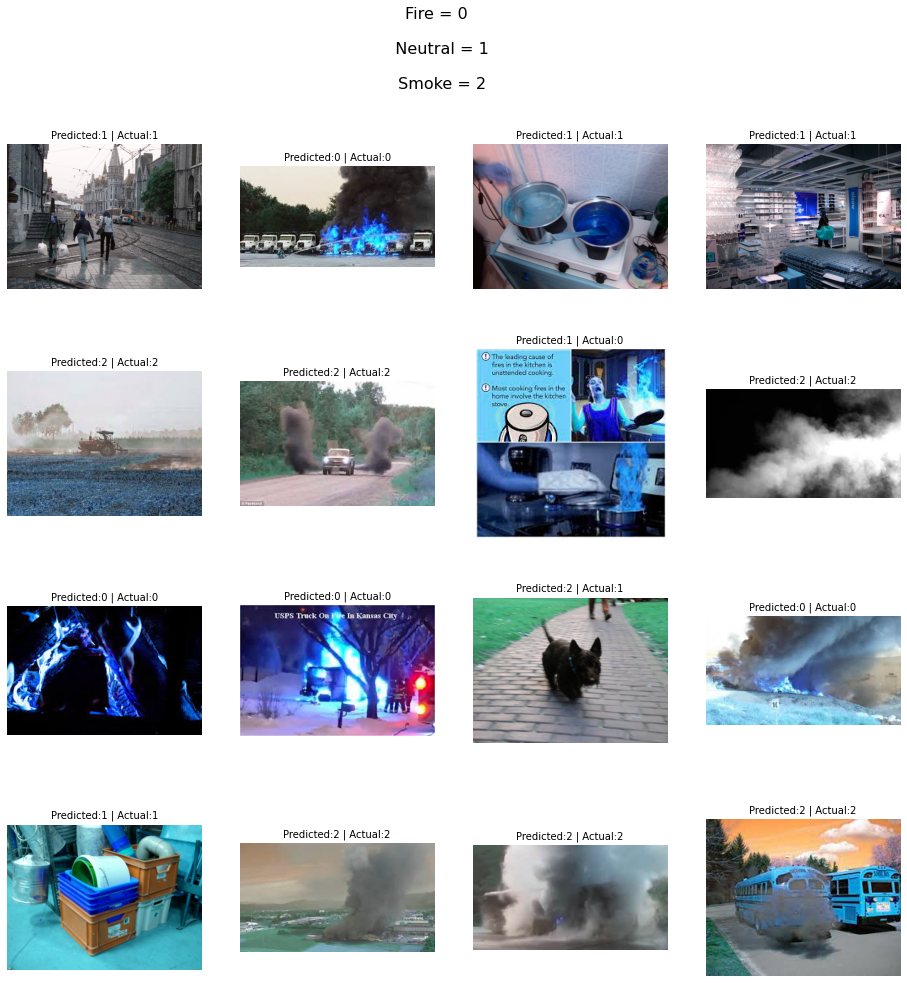

In [20]:
# Show images and labels and predicts
ncols=4
nrows=4

fig = plt.gcf()

fig.suptitle("Fire = 0 \n\n  Neutral = 1 \n\n Smoke = 2", fontsize=16)

fig.set_size_inches(ncols*4, nrows*4)

for i in range(16):
    
    random=randint(0, len(validation_generator.labels))
    prediction=preds_classes[random]
    img_path=validation_generator.filepaths[random]
    
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    sp.set_title(f'Predicted:{prediction} | Actual:{validation_generator.labels[random]}' ,fontsize=10)

    plt.imshow(cv2.cvtColor(mpimg.imread(img_path), cv2.COLOR_BGR2RGB))
    

plt.show()

In [21]:
model.save('VGG.h5',overwrite=True)